<a href="https://colab.research.google.com/github/samarth0174/PANDAS_M_GUIDE/blob/master/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/KeithGalli/Pandas-Data-Science-Tasks

Cloning into 'Pandas-Data-Science-Tasks'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Unpacking objects: 100% (41/41), done.


In [2]:
cd Pandas-Data-Science-Tasks/

/content/Pandas-Data-Science-Tasks


In [3]:
pwd

'/content/Pandas-Data-Science-Tasks'

In [4]:
cd SalesAnalysis/

/content/Pandas-Data-Science-Tasks/SalesAnalysis


**Import Libraries**

In [5]:
import pandas as pd
import os

**Merge the 12 month of sales data into a single CSV file**

In [6]:
files = [file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
  df = pd.read_csv("./Sales_Data/" + file)
  all_months_data =  pd.concat([all_months_data,df])

#save all data merged
all_months_data.to_csv("all_data_csv",index=False)

**Read merged csv**

In [7]:
all_data = pd.read_csv("all_data_csv")

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


**Clea up the data**

In [10]:
all_data = all_data.dropna(how='all')

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [12]:
all_data = all_data[all_data['Order Date'].str[0:2]!="Or"] 

**Augment data**

In [13]:
#add month colm
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'] = all_data['month'].astype('int32')

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


In [15]:
#add Sales column
all_data['Price Each'] = all_data['Price Each'].astype('float32')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')
all_data['sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [16]:
#add City Column:
#Using .apply() pandas

# note : Name(state) combination is imp. bcs 2 cities have same name.
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + "(" + x.split(',')[2].split(' ')[1] + ")")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,194095,Wired Headphones,1,11.990000,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.990000,New York City(NY)
1,194096,AA Batteries (4-pack),1,3.840000,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.840000,Dallas(TX)
2,194097,27in FHD Monitor,1,149.990005,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.990005,New York City(NY)
3,194098,Wired Headphones,1,11.990000,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.990000,Dallas(TX)
4,194099,AAA Batteries (4-pack),2,2.990000,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.980000,Seattle(WA)


##**Ques1 : What was the best month for sales?How much was earned that month?**

In [17]:
month_sales_stat = all_data.groupby(['month']).sum()


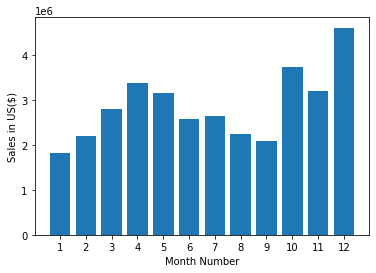

In [18]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,month_sales_stat['sales'])
plt.xticks(months)
plt.ylabel("Sales in US($)")
plt.xlabel("Month Number")
plt.show()


## **What US city had the highest Number of Sales:**

In [19]:
city_sales_stat = all_data.groupby(['city']).sum()
city_sales_stat

,Quantity Ordered,Price Each,month,sales
city,,,,
Atlanta(GA),16602,2779908.250,104794,2.795498e+06
Austin(TX),11153,1809873.625,69829,1.819582e+06
Boston(MA),22528,3637409.750,141112,3.661642e+06
Dallas(TX),16730,2752627.750,104620,2.767976e+06
Los Angeles(CA),33289,5421435.000,208325,5.452571e+06
New York City(NY),27932,4635371.000,175741,4.664318e+06
Portland(ME),2750,447189.250,17144,4.497583e+05
Portland(OR),11303,1860558.250,70621,1.870732e+06
San Francisco(CA),50239,8211461.500,315520,8.262204e+06


In [20]:
city_sales_stat.index

Index([' Atlanta(GA)', ' Austin(TX)', ' Boston(MA)', ' Dallas(TX)',
       ' Los Angeles(CA)', ' New York City(NY)', ' Portland(ME)',
       ' Portland(OR)', ' San Francisco(CA)', ' Seattle(WA)'],
      dtype='object', name='city')

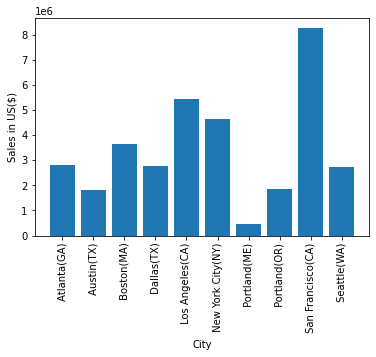

In [21]:
import matplotlib.pyplot as plt
plt.bar(city_sales_stat.index,city_sales_stat['sales'])
plt.xticks(city_sales_stat.index,rotation='vertical')
plt.ylabel("Sales in US($)")
plt.xlabel("City")
plt.show()


## **What time should we display advertisemens to maximize the likelihood of customer’s buying product?**

In [22]:
#using date time library - convert to date time format
all_data['Order Date']  = pd.to_datetime(all_data['Order Date'])

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,194095,Wired Headphones,1,11.990000,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.990000,New York City(NY)
1,194096,AA Batteries (4-pack),1,3.840000,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.840000,Dallas(TX)
2,194097,27in FHD Monitor,1,149.990005,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.990005,New York City(NY)
3,194098,Wired Headphones,1,11.990000,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.990000,Dallas(TX)
4,194099,AAA Batteries (4-pack),2,2.990000,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.980000,Seattle(WA)


In [24]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Minute
0,194095,Wired Headphones,1,11.990000,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.990000,New York City(NY),17,14
1,194096,AA Batteries (4-pack),1,3.840000,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.840000,Dallas(TX),14,43
2,194097,27in FHD Monitor,1,149.990005,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.990005,New York City(NY),11,36
3,194098,Wired Headphones,1,11.990000,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.990000,Dallas(TX),20,40
4,194099,AAA Batteries (4-pack),2,2.990000,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.980000,Seattle(WA),22,55


In [25]:
hour_stat = all_data.groupby(['Hour']).count()
hour_stat.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854


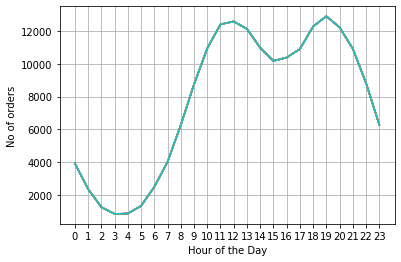

In [26]:
plt.plot(hour_stat.index,hour_stat)
plt.xticks(hour_stat.index)
plt.grid()
plt.xlabel("Hour of the Day")
plt.ylabel("No of orders")
plt.show()

## **What products are most often sold together?**

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Minute
0,194095,Wired Headphones,1,11.990000,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,11.990000,New York City(NY),17,14
1,194096,AA Batteries (4-pack),1,3.840000,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,3.840000,Dallas(TX),14,43
2,194097,27in FHD Monitor,1,149.990005,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,149.990005,New York City(NY),11,36
3,194098,Wired Headphones,1,11.990000,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,11.990000,Dallas(TX),20,40
4,194099,AAA Batteries (4-pack),2,2.990000,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,5.980000,Seattle(WA),22,55


In [28]:
# Finding duplicate values in our DataFrame
### https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df  = all_data[all_data['Order ID'].duplicated(keep=False)]
##
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
# Use transform() method to join values from two rows into a single row

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,Hour,Minute,Grouped
15,194110,Google Phone,1,600.00,2019-05-31 18:07:00,"498 14th St, Los Angeles, CA 90001",5,600.00,Los Angeles(CA),18,7,"Google Phone,Wired Headphones"
16,194110,Wired Headphones,1,11.99,2019-05-31 18:07:00,"498 14th St, Los Angeles, CA 90001",5,11.99,Los Angeles(CA),18,7,"Google Phone,Wired Headphones"
77,194170,Google Phone,1,600.00,2019-05-30 12:30:00,"711 Maple St, San Francisco, CA 94016",5,600.00,San Francisco(CA),12,30,"Google Phone,USB-C Charging Cable"
78,194170,USB-C Charging Cable,2,11.95,2019-05-30 12:30:00,"711 Maple St, San Francisco, CA 94016",5,23.90,San Francisco(CA),12,30,"Google Phone,USB-C Charging Cable"
82,194174,iPhone,1,700.00,2019-05-04 23:08:00,"37 North St, Seattle, WA 98101",5,700.00,Seattle(WA),23,8,"iPhone,Lightning Charging Cable,Wired Headphones"


In [29]:
#Dropping rows with duplicate values
df = df[['Order ID' , 'Grouped']].drop_duplicates()

In [30]:
 df

,Order ID,Grouped
15,194110,"Google Phone,Wired Headphones"
77,194170,"Google Phone,USB-C Charging Cable"
82,194174,"iPhone,Lightning Charging Cable,Wired Headphones"
89,194179,"Flatscreen TV,AAA Batteries (4-pack)"
103,194192,"Wired Headphones,Bose SoundSport Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [33]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
#Counting pairs of products (itertools, collections)
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

#most common possible combinations - This data can be used by companies
#to sell 2 items together or in a recommendation
for key,value in count.most_common(10):
  print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## **Question 5: What product sold the most? Why do you think it did?** 

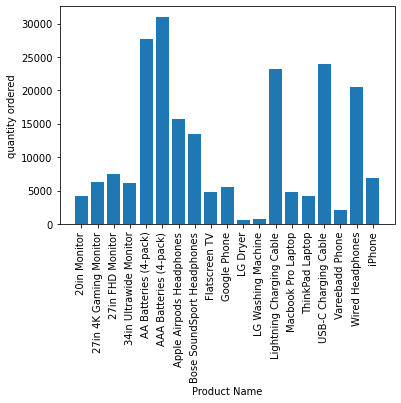

In [50]:
product_group = all_data.groupby('Product')
quant_ordered = product_group.sum()['Quantity Ordered']

products = [prod for prod, pp in product_group]
plt.bar(products,quant_ordered)
plt.xticks(products,rotation='vertical')
plt.ylabel("quantity ordered")
plt.xlabel("Product Name")
plt.show()




since AAA batteries are small , cheap items they are ordered in max quantity , therefore its not okay to compare big items like monitor with batteries

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32


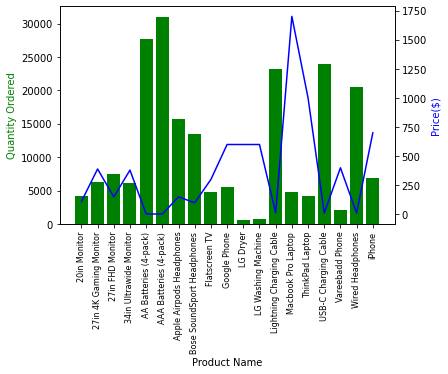

In [54]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

fig , ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products,quant_ordered,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()